In [1]:
!pip install clodsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.2/276.2 KB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for clodsa: filename=clodsa-1.2.48-py2.py3-none-any.whl size=74331 sha256=a46ed3d6c7f5e8ca113518b8f4a19a35452edccb878721faf090b08f224d75ff
  Stored in directory: /root/.cache/pip/wheels/4e/12/dd/63aec11bcf4d6485c60d87ff4d1ead7a7175b97660d7af5fdc
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12092 sha256=a3ab765879acc92ee8a48c6195a319ab7ddc45d7dd60a12872fba884a63ef089
  Stored in directory: /root/.cache/pip/wheels/2c/1c/b5/6f1b1411615716f6d2b52b9301bfaf032ed5f68d4c7d547be8
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=625

In [3]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
import os
%matplotlib inline

In [4]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [5]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [6]:
INPUT_PATH = "mydrive/CSE465/yolov5/micrography/camera_micrography"

In [7]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_images_yolo5"
INPUT_PATH = "mydrive/CSE465/yolov5/micrography/camera_micrography"
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

### Load an image

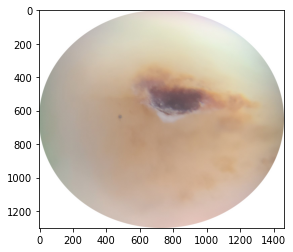

In [11]:
img = cv2.imread("mydrive/CSE465/yolov5/225.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

In [12]:
def classCount(labelPath):

  c1 = 0
  c2 = 0
  c3 = 0 
  c0 = 0

  for root, dirs, files in os.walk(labelPath):
    for file in files:    
        if file.endswith('.txt'):
           lines = [line.rstrip('\n') for line in open(labelPath+file)]
           if lines != ['']:
             for line in lines:
               components = line.split(" ")
               category = components[0]
               if category == '0':
                 c1 += 1
               elif category == '1':
                 c2 += 1
               elif category == '2':
                 c3 += 1
                 
          
                
              
  print('Class 1:', c1)
  print('Class 2:', c2)
  print('Class 3:', c3)
  


              
   

In [13]:
classCount("mydrive/CSE465/yolov5/micrography/camera_micrography/")

Class 1: 30
Class 2: 27
Class 3: 10


In [14]:
print("Number of images in the folder")
!ls -1 mydrive/CSE465/yolov5/micrography/camera_micrography/*.jpg | wc -l

Number of images in the folder
78


In [15]:
!ls mydrive/CSE465/yolov5/micrography/camera_micrography

100.jpg  13.jpg   158.jpg  175.jpg  201.jpg  23_1_208.jpg  42.jpg  63.jpg
100.txt  13.txt   158.txt  175.txt  201.txt  23_1_208.txt  42.txt  63.txt
104.jpg  140.jpg  159.jpg  176.jpg  204.jpg  233.jpg	   45.jpg  69.jpg
104.txt  140.txt  159.txt  176.txt  204.txt  233.txt	   45.txt  69.txt
106.jpg  142.jpg  15.jpg   177.jpg  210.jpg  23.jpg	   46.jpg  70.jpg
106.txt  142.txt  15.txt   177.txt  210.txt  23.txt	   46.txt  70.txt
108.jpg  146.jpg  160.jpg  179.jpg  212.jpg  29.jpg	   48.jpg  78.jpg
108.txt  146.txt  160.txt  179.txt  212.txt  29.txt	   48.txt  78.txt
10.jpg	 149.jpg  164.jpg  189.jpg  213.jpg  31.jpg	   50.jpg  83.jpg
10.txt	 149.txt  164.txt  189.txt  213.txt  31.txt	   50.txt  83.txt
110.jpg  14.jpg   165.jpg  195.jpg  219.jpg  33.jpg	   52.jpg  91.jpg
110.txt  14.txt   165.txt  195.txt  219.txt  33.txt	   52.txt  91.txt
114.jpg  150.jpg  169.jpg  196.jpg  223.jpg  36.jpg	   54.jpg  94.jpg
114.txt  150.txt  169.txt  196.txt  223.txt  36.txt	   54.txt  94.txt
115.jpg  152

# Yolo image augmentation

In [16]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [17]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])

Showing Image with bounding boxes

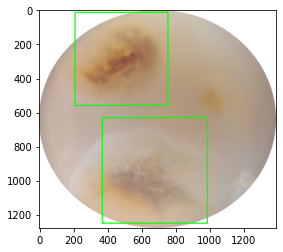

In [ ]:
img,boxes = boxesFromYOLO("mydrive/CSE465/yolov5/micrography/camera_micrography/23_1_208.jpg","mydrive/CSE465/yolov5/micrography/camera_micrography/23_1_208.txt")
showBoxes(img,boxes)

Define a transformer generator.


In [ ]:
transformer = transformerGenerator(PROBLEM)

### Vertical Flip

In [ ]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

Showing the augmentation result

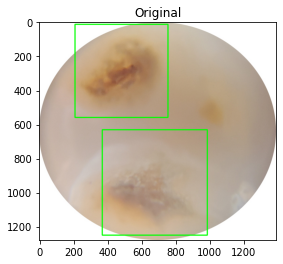

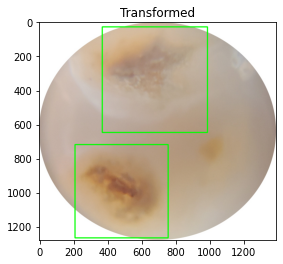

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

### Horizontal Flip

In [ ]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

Showing the augmentation result

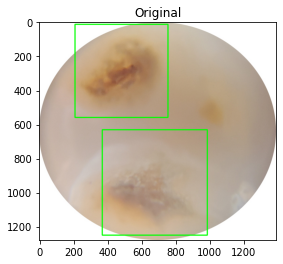

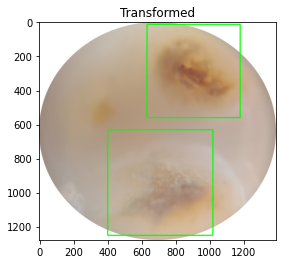

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

### Horizontally and Vertically Flip

In [ ]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

Showing the augmentation result

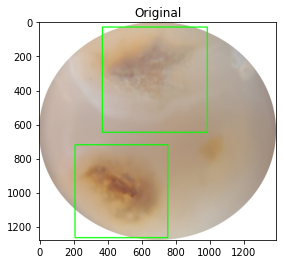

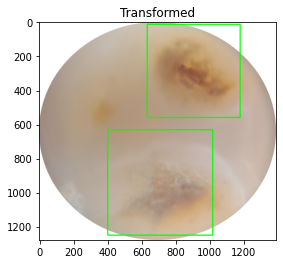

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hvFlipGenerator = transformer(hvFlip)
hvFlipImg,hvFlipBoxes = hvFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hvFlipImg,hvFlipBoxes)

### Rotation

In [ ]:
rotate = createTechnique("rotate", {"angle" : 90})
augmentor.addTransformer(transformer(rotate))

Showing augmentation result

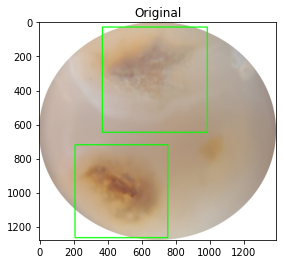

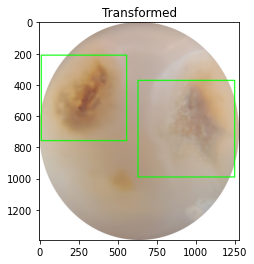

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

### Hue

In [ ]:
hue = createTechnique("raise_hue", {"power" : 0.8})
augmentor.addTransformer(transformer(hue))

SHowing augemntation result

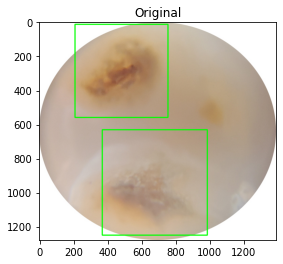

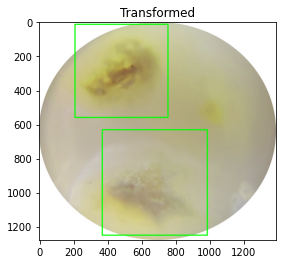

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(hue)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hueImg,hueBoxes)

### Average Blur

In [ ]:
avgBlur =  createTechnique("average_blurring", {"kernel" : 11})
augmentor.addTransformer(transformer(avgBlur))

Showing augmentation result

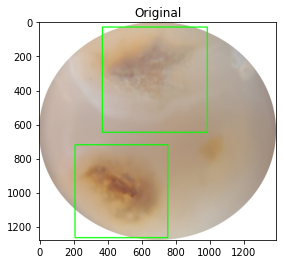

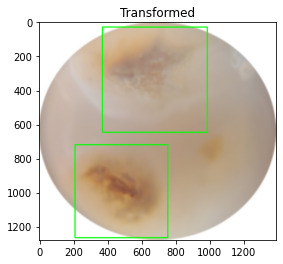

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
avgBlurGenerator = transformer(avgBlur)
avgBlurImg,avgBlurBoxes = avgBlurGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(avgBlurImg,avgBlurBoxes)

### Invert

In [ ]:
invt = createTechnique("invert",{300})
augmentor.addTransformer(transformer(invt))

Showing augmentation result

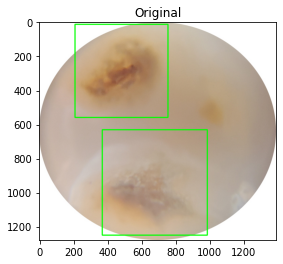

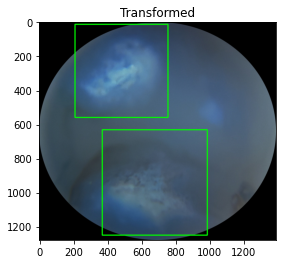

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
invtGenerator = transformer(invt)
invtImg,invtBoxes = invtGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(invtImg,invtBoxes)

### HSV

In [ ]:
hsv = createTechnique("change_to_hsv",{})
augmentor.addTransformer(transformer(hsv))


Augmented result

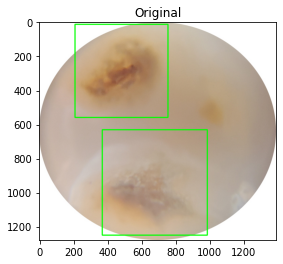

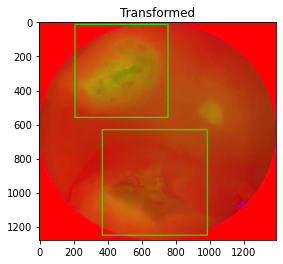

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hsvGenerator = transformer(hsv)
hsvImg,hsvBoxes = hsvGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hsvImg,hsvBoxes)


Drop

In [ ]:
drp  =createTechnique("dropout",{"percentage":0.10})
augmentor.addTransformer(transformer(drp))


Result

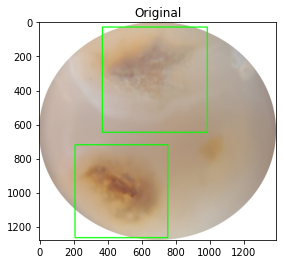

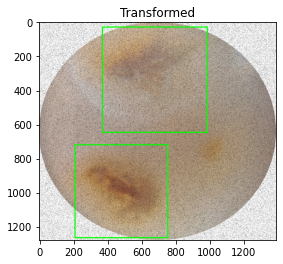

In [ ]:

plt.figure()
plt.title("Original")
showBoxes(img,boxes)
drpGenerator = transformer(drp)
drpImg,drpBoxes = drpGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(drpImg,drpBoxes)

In [ ]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

In [ ]:
augmentor.applyAugmentation()

In [ ]:
print("Number of images in the folder")
!ls -1 augmented_images_yolo5/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 augmented_images_yolo5/*.txt | wc -l

Number of images in the folder
2330
Number of annotations in the folder
2330


In [ ]:
!zip -r augmented_images_yolo.zip augmented_images_yolo5
from google.colab import files
files.download('augmented_images_yolo.zip') 

updating: augmented_images_yolo5/ (stored 0%)
updating: augmented_images_yolo5/70_6_71.txt (deflated 26%)
updating: augmented_images_yolo5/168_2_169.txt (deflated 48%)
updating: augmented_images_yolo5/115_7_116.jpg (deflated 3%)
updating: augmented_images_yolo5/197_3_198.txt (deflated 27%)
updating: augmented_images_yolo5/67_3_68.jpg (deflated 2%)
updating: augmented_images_yolo5/160_5_161.jpg (deflated 6%)
updating: augmented_images_yolo5/74_1_75.txt (deflated 45%)
updating: augmented_images_yolo5/128_1_129.txt (stored 0%)
updating: augmented_images_yolo5/118_5_119.jpg (deflated 7%)
updating: augmented_images_yolo5/117_8_118.txt (deflated 32%)
updating: augmented_images_yolo5/112_7_113.txt (deflated 47%)
updating: augmented_images_yolo5/227_0_228.txt (deflated 28%)
updating: augmented_images_yolo5/169_9_170.txt (deflated 28%)
updating: augmented_images_yolo5/117_1_118.txt (deflated 26%)
updating: augmented_images_yolo5/27_4_28.txt (stored 0%)
updating: augmented_images_yolo5/181_7_182

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>